In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (7, 7)

# Version 1 [https://www.scilab.org/computer-vision-structural-analysis]

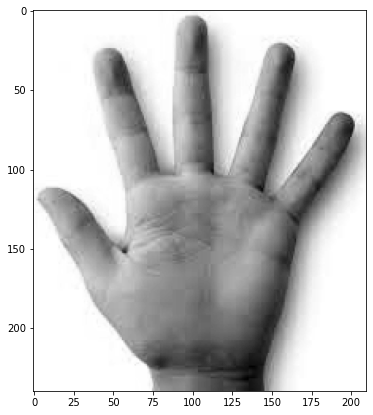

In [2]:
# Loading image
S = cv.imread("hand.png", cv.IMREAD_GRAYSCALE)
plt.imshow(S, cmap='gray');

In [3]:
# Image bluring (depending on situation)
Sb = cv.GaussianBlur(S, [35, 35], 0.1)

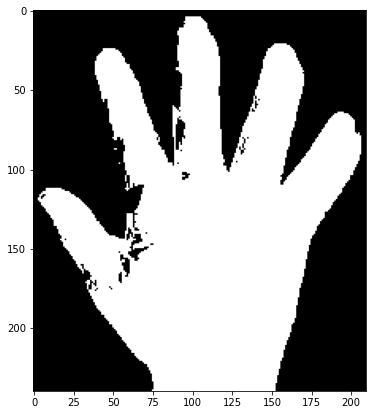

In [4]:
# Convert to inverse binary
thresh, img_bw = cv.threshold(Sb, 220, 255, cv.THRESH_BINARY_INV)
plt.imshow(img_bw, cmap='gray');

In [5]:
# Find contours
contours, hierarchy = cv.findContours(img_bw, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [6]:
# Find the largest contour
sc = np.zeros_like(contours)
for cnt in range(len(contours)):
    cont = contours[cnt]
    sc[cnt] = len(cont)
maxV, maxI = sc.max(), sc.argmax()

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [7]:
# Find the convex hull
hull = []  # create hull array for convex hull points
for i in range(len(contours)):  # calculate points for each contour
    hull.append(cv.convexHull(contours[i], False))  # creating convex hull object for each contour

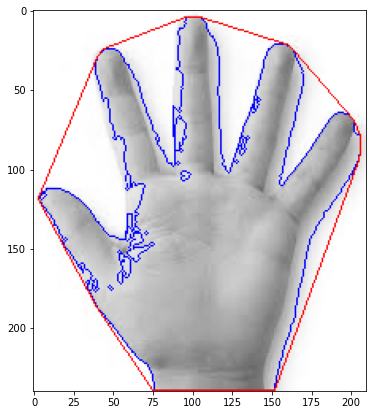

In [8]:
# Show the image, contour of the largest component, and the convex hull of it
Sb = cv.cvtColor(Sb, cv.COLOR_BGR2RGB)
cv.drawContours(Sb, contours, maxI, (0, 0, 255), 1, 8, hierarchy)
cv.drawContours(Sb, hull, maxI, (255, 0, 0), 1, 8)
plt.imshow(Sb);

In [9]:
# # Draw the Convex Hull
# thresh = img_bw

# # create an empty black image
# drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
 
# # draw contours and hull points
# for i in range(len(contours)):
#     color_contours = (0, 255, 0) # green - color for contours
#     color = (255, 0, 0) # blue - color for convex hull
#     # draw ith contour
#     cv.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
#     # draw ith convex hull object
#     cv.drawContours(drawing, hull, i, color, 1, 8)
# plt.imshow(drawing);

In [10]:
# Calculating and visualizing convexity defects
cont = contours[maxI]
hull2 = cv.convexHull(cont, returnPoints=False)
defects = cv.convexityDefects(cont, hull2)

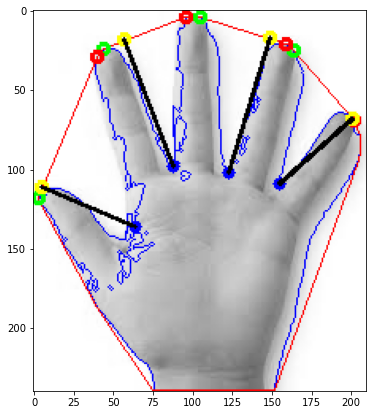

In [11]:
# Finding convexity defects
cnt = 0
for i in range(defects.shape[0]): # calculate the angle
    s, e, f, d = defects[i][0]
    start = tuple(contours[maxI][s][0])
    end = tuple(contours[maxI][e][0])
    far = tuple(contours[maxI][f][0])
    a = np.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
    b = np.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
    c = np.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
    angle = np.arccos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c)) # cosine theorem
    if angle <= np.pi / 2: # angle less than 90 degree, treat as fingers
        cnt += 1
        cv.circle(Sb, start, 3, [255, 0, 0], 2)
        cv.circle(Sb, end, 3, [0, 255, 0], 2)
        cv.circle(Sb, far, 4, [0, 0, 255], -1)
        
        # Calculating Don
        m = (end[1] - start[1]) / (end[0] - start[0])
        c = end[1] - m * end[0]
        m2 = -1 / m
        c2 = far[1] - m2 * far[0]
        A = np.array([[-m, 1], [-m2, 1]])
        B = np.array([c, c2])
        ptc = np.linalg.inv(A) @ B
        # print(A, B, ptc)
        cv.circle(Sb, (int(ptc[0]), int(ptc[1])), 3, [255, 255, 0], 2)
        cv.line(Sb, (int(ptc[0]), int(ptc[1])), far, [0, 0, 0], 2)
        
plt.imshow(Sb);

# Version 2 [https://www.tqwba.com/x_d/jishu/253338.html]

In [12]:
# https://www.programcreek.com/python/?project_name=lzane%2FFingers-Detection-using-OpenCV-and-Python
# https://www.intorobotics.com/9-opencv-tutorials-hand-gesture-detection-recognition/

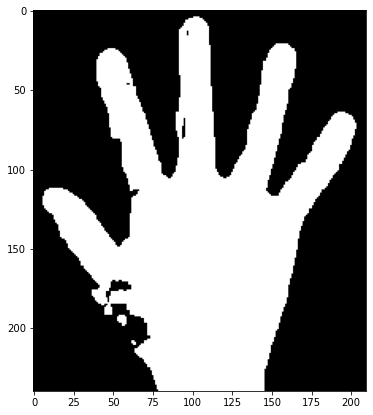

In [13]:
img = cv.imread("hand.png")
hsvim = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")
skinRegionHSV = cv.inRange(hsvim, lower, upper)
blurred = cv.blur(skinRegionHSV, (2,2))
ret,thresh = cv.threshold(blurred,0,255,cv.THRESH_BINARY)
plt.imshow(thresh, cmap='gray');

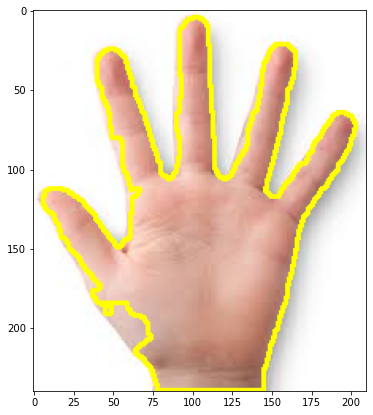

In [14]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = max(contours, key=lambda x: cv.contourArea(x))
cv.drawContours(img, [contours], -1, (255,255,0), 2)
plt.imshow(img);

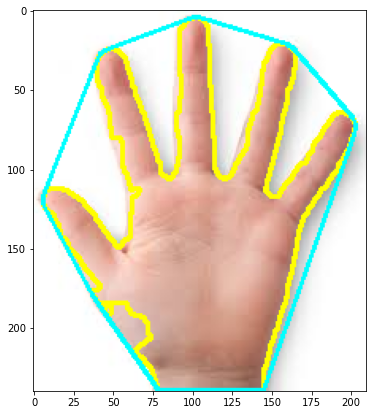

In [15]:
hull = cv.convexHull(contours)
cv.drawContours(img, [hull], -1, (0, 255, 255), 2)
plt.imshow(img);

In [16]:
hull = cv.convexHull(contours, returnPoints=False)
defects = cv.convexityDefects(contours, hull)

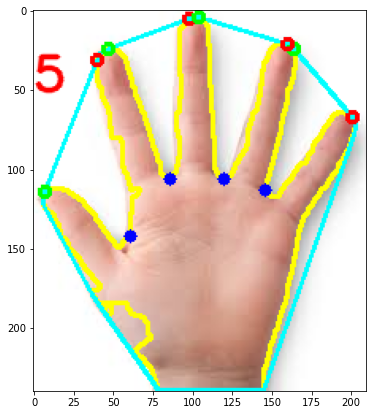

In [17]:
if defects is not None:
    cnt = 0
    for i in range(defects.shape[0]): # calculate the angle
        s, e, f, d = defects[i][0]
        start = tuple(contours[s][0])
        end = tuple(contours[e][0])
        far = tuple(contours[f][0])
        a = np.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
        b = np.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
        c = np.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
        angle = np.arccos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c)) # cosine theorem
        if angle <= np.pi / 2: # angle less than 90 degree, treat as fingers
            cnt += 1
            cv.circle(img, start, 3, [255, 0, 0], 2)
            cv.circle(img, end, 3, [0, 255, 0], 2)
            cv.circle(img, far, 4, [0, 0, 255], -1)
    if cnt > 0:
        cnt = cnt+1
        cv.putText(img, str(cnt), (0, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv.LINE_AA)
plt.imshow(img);